<a href="https://colab.research.google.com/github/mcmaharrey/MLA_MCM/blob/main/MLA4_MCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matthew Maharrey <br>
CS430-ON <br>
Assignment 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/CS430/banknote_authentication.csv")

**Import for Decision Trees**

In [ ]:
from sklearn import tree
from sklearn.tree import export_text

**Imports for Splitting Data and Building Pipeline**

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

**Imports for Performance Measures**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Confusion Matrix Function**

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [ ]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

**Splitting Data into Train/Test**

In [ ]:
X = df.drop(columns=['forgery'])

In [ ]:
y = df[['forgery']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1097, 4)
X_test shape: (275, 4)
y_train shape: (1097, 1)
y_test shape: (275, 1)


**Building the Pipeline**


In [ ]:
numerical_indices = X.select_dtypes(include=['float64', 'int64']).columns

column_transformer = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_indices)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('transform', column_transformer),  # MinMax scaling
    ('decision_tree', tree.DecisionTreeClassifier(max_depth=5))  # Decision Tree Classifier
])



**Executing the Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

**Evaluating the Model**

Precision: 1.0
Recall: 0.9291338582677166
F1 Score: 0.963265306122449


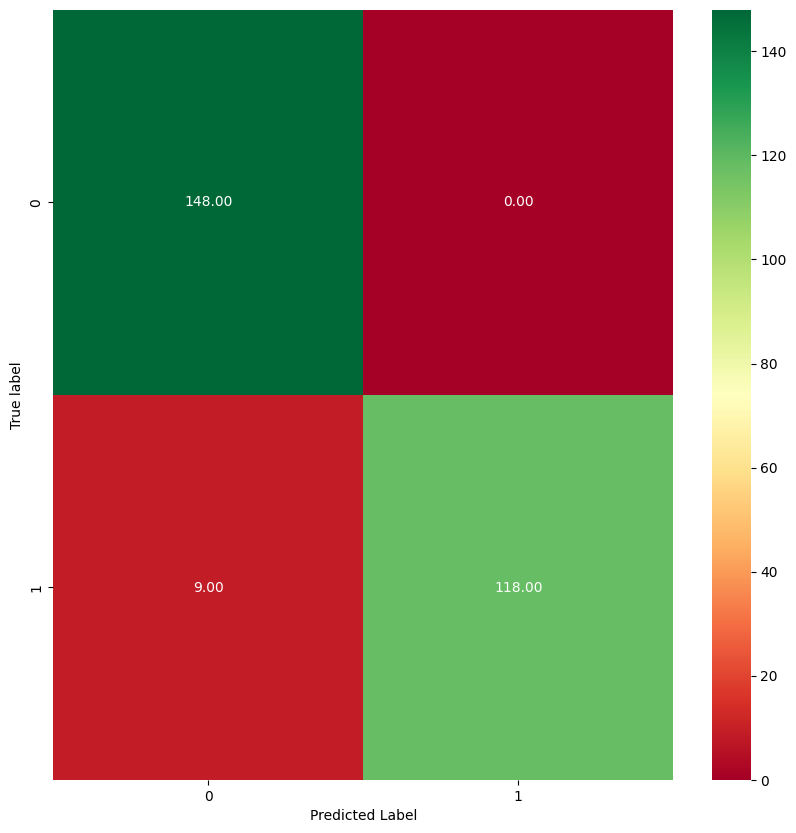

In [ ]:
y_pred = pipeline.predict(X_test)

plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


The precision is 1.0 which means that all  of the positive instances were predicted correctly.<br>
The recall is 0.9291 which mena that out of all the positive instances the model was able to identify 92% correct <br>
The f1 score is 0.9633 which shows that there is a good correlation between the recall and precision.

**Conclusion**

Overall the data shows that the model worked great.

[Text(0.5333333333333333, 0.9166666666666666, 'x[0] <= 0.531\nsamples = 1097\nvalue = [614, 483]'),
 Text(0.35833333333333334, 0.75, 'x[1] <= 0.806\nsamples = 528\nvalue = [97, 431]'),
 Text(0.25, 0.5833333333333334, 'x[0] <= 0.475\nsamples = 450\nvalue = [32, 418]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[2] <= 0.495\nsamples = 380\nvalue = [12, 368]'),
 Text(0.06666666666666667, 0.25, 'x[1] <= 0.786\nsamples = 259\nvalue = [1, 258]'),
 Text(0.03333333333333333, 0.08333333333333333, 'samples = 254\nvalue = [0, 254]'),
 Text(0.1, 0.08333333333333333, 'samples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.25, 'x[1] <= 0.34\nsamples = 121\nvalue = [11, 110]'),
 Text(0.16666666666666666, 0.08333333333333333, 'samples = 109\nvalue = [0, 109]'),
 Text(0.23333333333333334, 0.08333333333333333, 'samples = 12\nvalue = [11, 1]'),
 Text(0.36666666666666664, 0.4166666666666667, 'x[2] <= 0.34\nsamples = 70\nvalue = [20, 50]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= 0.719\nsamples = 59\nvalue = 

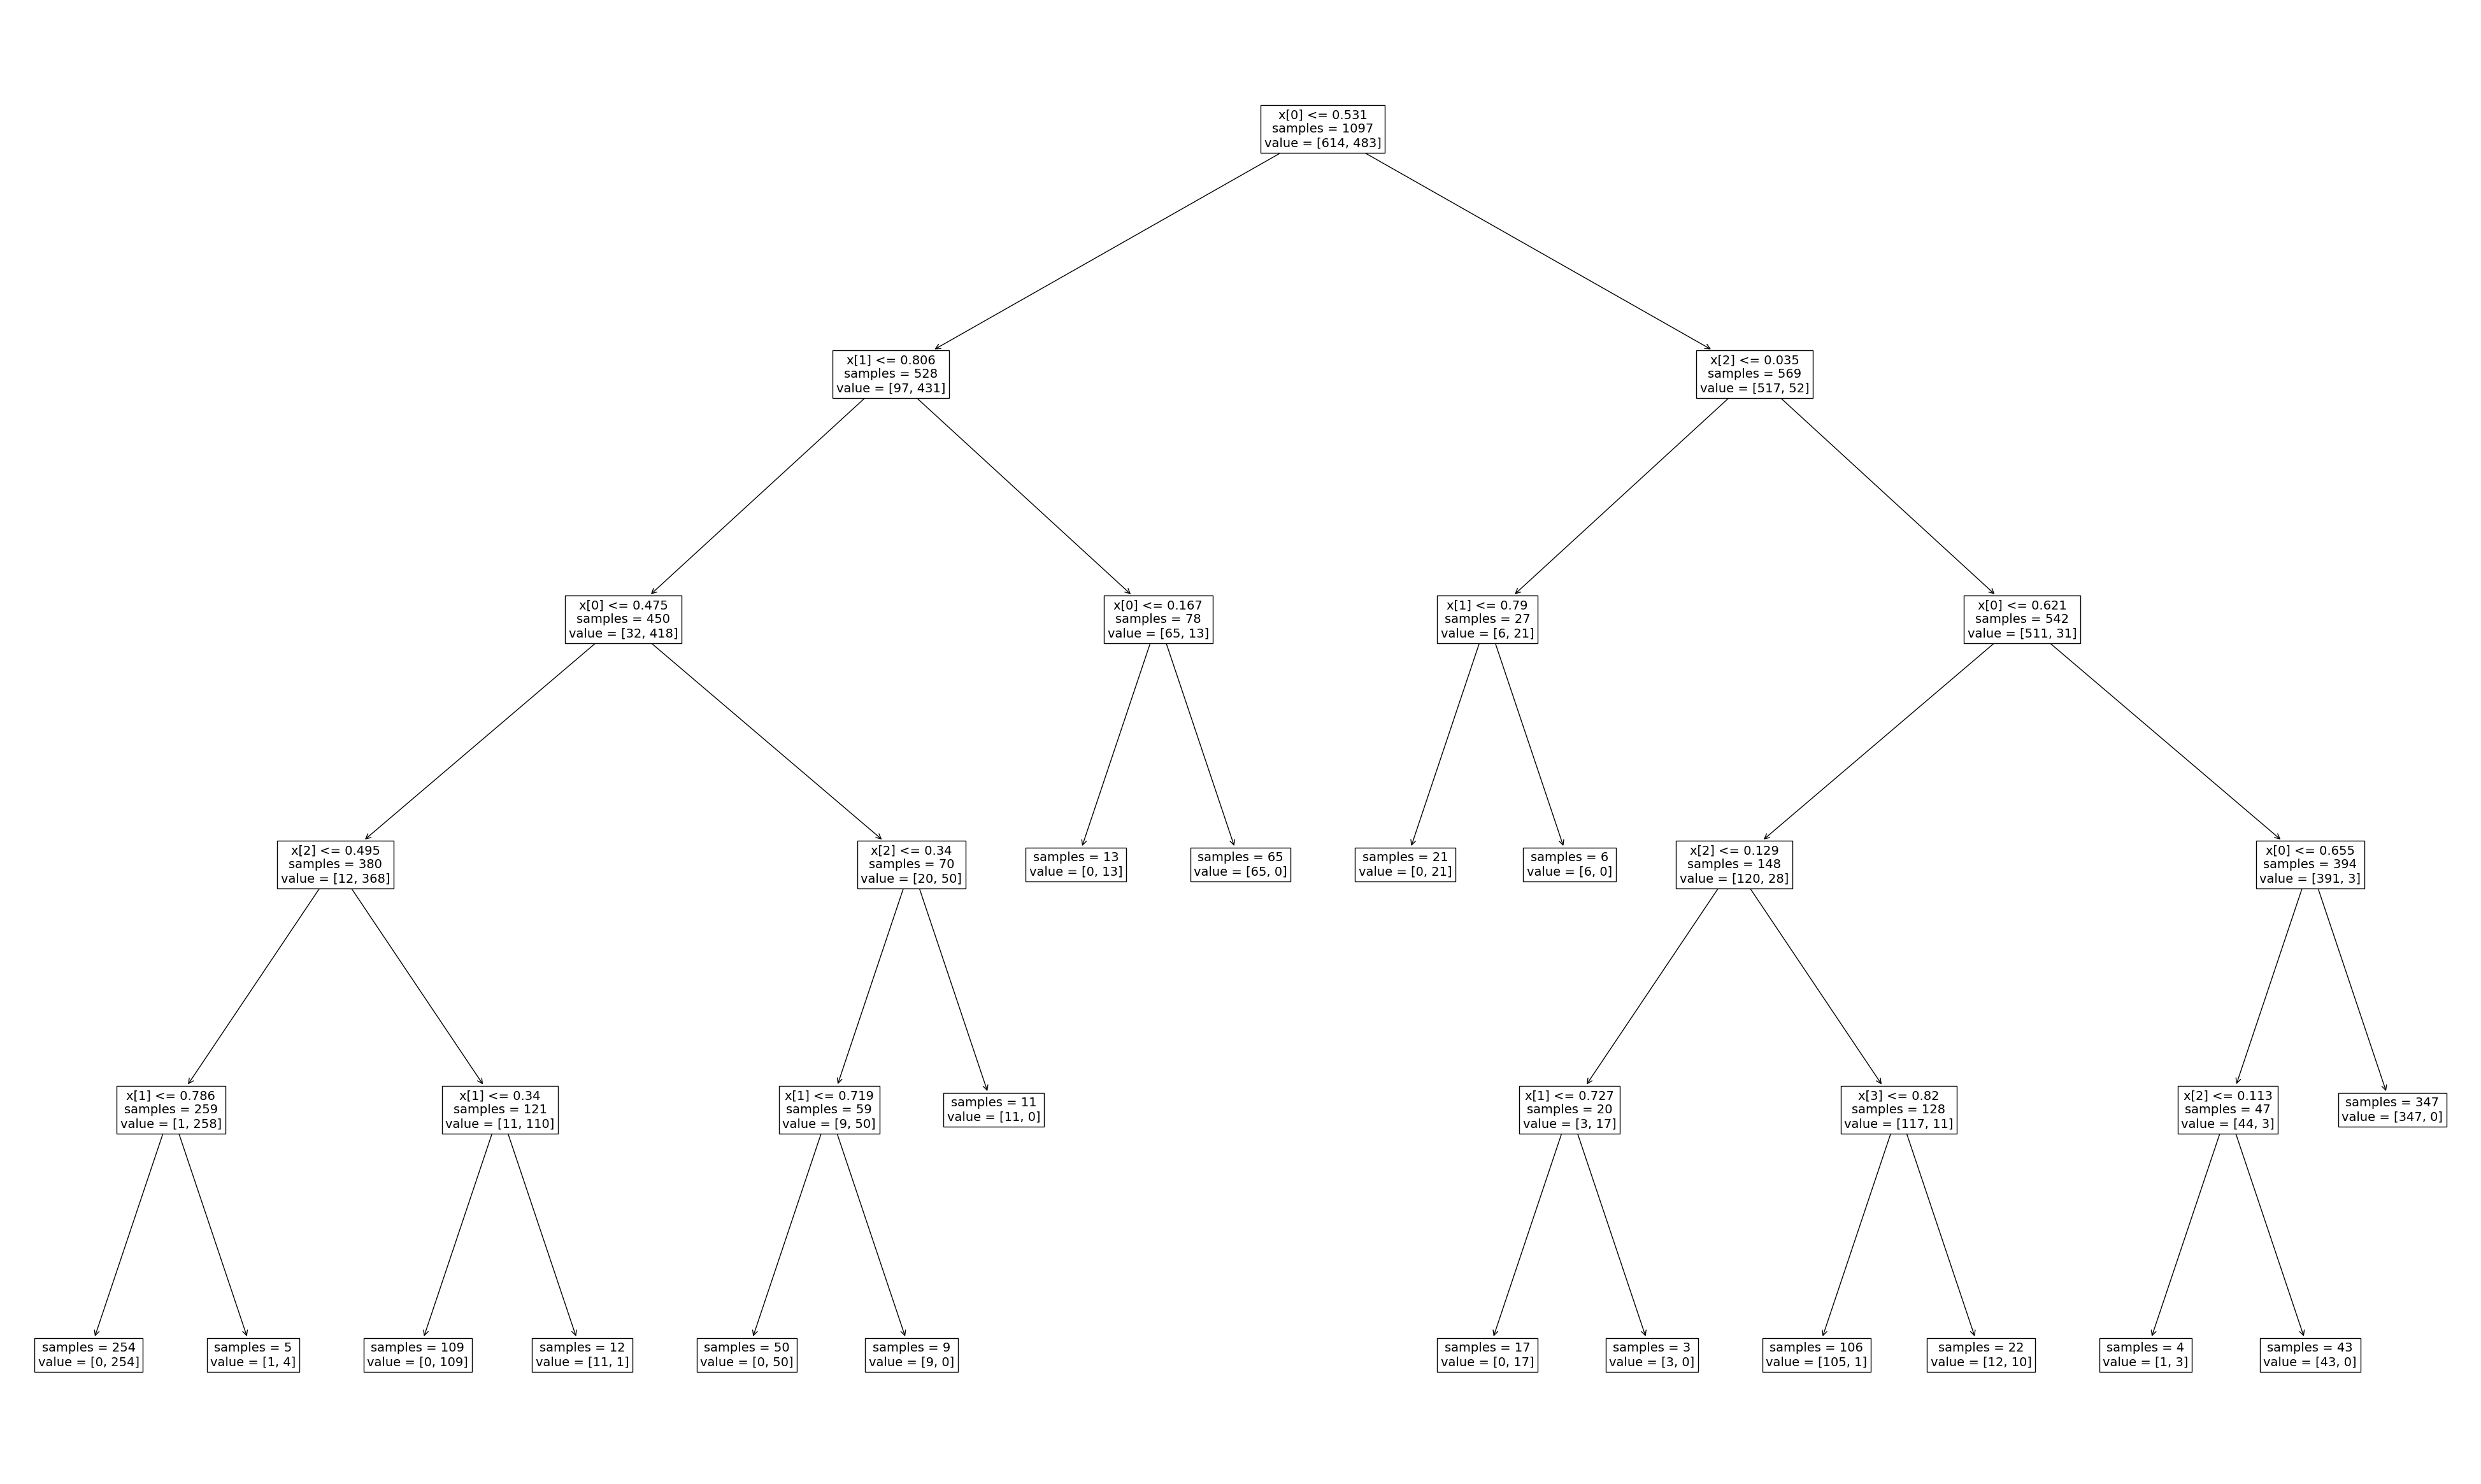

In [ ]:
fig = plt.figure(figsize=(50,30))
tree.plot_tree(pipeline.named_steps.decision_tree, fontsize=14, impurity=False)

**DecisionTree Regression**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df.columns = ['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']

**Splitting Data into Train/Test**

In [ ]:
X = df.drop(columns=['date', 'usage_kwh'])
y = df[['usage_kwh']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28032, 9)
X_test shape: (7008, 9)
y_train shape: (28032, 1)
y_test shape: (7008, 1)


**Building the Pipeline**

In [ ]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline([
    ('transform', preprocessor),
    ('decision_tree', DecisionTreeRegressor())
])


**Executing the Model**

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('decision_tree', DecisionTreeRegressor())])

**Evaluating the Model**


In [ ]:
y_pred = pipeline.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE for train data:", rmse_train)
print("RMSE for test data:", rmse_test)

RMSE for train data: 1.8553710965942501e-16
RMSE for test data: 1.4529460800882583


The RMSE for the train is a very small value which indicated that the model is preforming good on the training data. <br>
The RMSE for the test is also similar to the train data and shows that the model's predictions were only off by 1.42.

I feel that with a RMSE of 1.42 the model would preform well for predicting the Kwh usage.